<a href="https://www.kaggle.com/code/samithsachidanandan/linear-regression-from-scratch-in-python?scriptVersionId=265969076" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [3]:
def gradient_descent(m_now, b_now, points, alpha):
    x = points['MedInc'].values
    y = points['MedHouseVal'].values

    n = len(x)
    
    y_pred = m_now * x + b_now
    m_gradient = -(2/n) * sum(x * (y - y_pred))
    b_gradient = -(2/n) * sum(y - y_pred)
    
    m = m_now - alpha * m_gradient
    b = b_now - alpha * b_gradient

    return m, b

Epoch 0: m=0.1903, b=0.0414
Epoch 100: m=0.4681, b=0.2123
Epoch 200: m=0.4525, b=0.2865
Epoch 300: m=0.4417, b=0.3376
Epoch 400: m=0.4343, b=0.3729
Epoch 500: m=0.4292, b=0.3971
Epoch 600: m=0.4257, b=0.4138
Epoch 700: m=0.4233, b=0.4254
Epoch 800: m=0.4216, b=0.4333
Epoch 900: m=0.4205, b=0.4388

Final values:
m = 0.4196981412988478
b = 0.4424885379162605


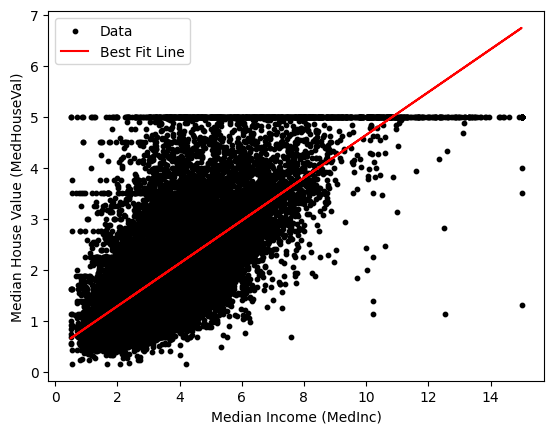

In [4]:
m = 0
b = 0
alpha = 0.01  
epochs = 1000


for i in range(epochs):
    m, b = gradient_descent(m, b, df, alpha)
    if i % 100 == 0:
        print(f"Epoch {i}: m={m:.4f}, b={b:.4f}")

print("\nFinal values:")
print(f"m = {m}")
print(f"b = {b}")


plt.scatter(df['MedInc'], df['MedHouseVal'], color='black', s=10, label='Data')
x_line = df['MedInc']
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.legend()
plt.show()

In [5]:
def compute_mse(m, b, points):
    x = points['MedInc'].values
    y = points['MedHouseVal'].values
    return np.mean((y - (m*x + b))**2)

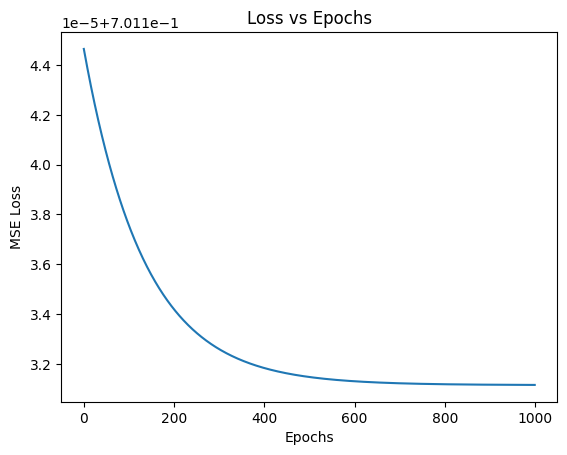

In [6]:
losses = []

for i in range(epochs):
    m, b = gradient_descent(m, b, df, alpha)
    loss = compute_mse(m, b, df)
    losses.append(loss)

plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss vs Epochs")
plt.show()